# Import Libraries

In [5]:
import pandas as pd
pd.options.display.max_rows = 100 
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams

# Load All Data Sets

In [6]:
arg_sales1 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/arg_sales_2015_2016.csv')
arg_sales1.head()

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
0,1,536,YOUNGSTOWN,2015,1,12/29/2014,2600.03
1,1,536,YOUNGSTOWN,2015,1,12/30/2014,2333.04
2,1,536,YOUNGSTOWN,2015,1,12/31/2014,2045.05
3,1,536,YOUNGSTOWN,2015,1,1/1/2015,1355.33
4,1,536,YOUNGSTOWN,2015,1,1/2/2015,2645.63


In [7]:
arg_sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710163 entries, 0 to 710162
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Rest_Number         710163 non-null  int64  
 1   Rest_DMA_Code       710163 non-null  int64  
 2   Rest_DMA_Desc       710163 non-null  object 
 3   Fiscal_Year         710163 non-null  int64  
 4   Fiscal_Week_Number  710163 non-null  int64  
 5   Days_Date           710163 non-null  object 
 6   Sales_TY            710163 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 37.9+ MB


In [8]:
arg_sales3 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/arg_sales_2017_2018.csv')
arg_sales3.head()

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
0,1,536,YOUNGSTOWN,2017,1,1/2/2017,3119.95
1,1,536,YOUNGSTOWN,2017,1,1/3/2017,3676.76
2,1,536,YOUNGSTOWN,2017,1,1/4/2017,3949.02
3,1,536,YOUNGSTOWN,2017,1,1/5/2017,3012.36
4,1,536,YOUNGSTOWN,2017,1,1/6/2017,3948.25


In [9]:
arg_sales3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785506 entries, 0 to 785505
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Rest_Number         785506 non-null  int64  
 1   Rest_DMA_Code       785506 non-null  int64  
 2   Rest_DMA_Desc       785506 non-null  object 
 3   Fiscal_Year         785506 non-null  int64  
 4   Fiscal_Week_Number  785506 non-null  int64  
 5   Days_Date           785506 non-null  object 
 6   Sales_TY            785506 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 42.0+ MB


In [10]:
tv_media = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/case_study_media_data.csv')
tv_media

,rest_dma_code,fiscal_year,fiscal_week_number,OnAir_TY,Equal_TRPS_CM_TY
0,501,2015,1,0,0.0
1,501,2015,2,0,0.0
2,501,2015,3,0,0.0
3,501,2015,4,0,0.0
4,501,2015,5,0,0.0
...,...,...,...,...,...
13723,770,2018,48,1,118.0
13724,770,2018,49,1,185.8
13725,770,2018,50,1,132.6
13726,770,2018,51,1,127.9


In [11]:
competition = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/Competitive Data.csv')
competition.head()

,Store #,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,# of McDonalds <0.5 mi,# of Subway <0.5 mi,# of Wendys <0.5 mi,# of Burger King <0.5 mi,# of Taco Bell <0.5 mi
0,5938,0,0,0,0,0,0,0,0,0,0
1,6394,0,0,1,1,0,0,0,1,1,0
2,7724,1,2,0,0,0,1,2,0,0,0
3,6204,1,1,1,1,1,0,1,0,1,0
4,6830,1,2,1,1,1,1,1,1,1,1


In [12]:
print_media = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/store print info.csv')
print_media.head()

,rest_number,drop_date,fiscal_year,fiscal_week_number
0,10,3/24/2015,2015,13
1,1,3/24/2015,2015,13
2,86,3/24/2015,2015,13
3,228,9/29/2015,2015,40
4,85,3/24/2015,2015,13


In [13]:
restaurant = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/restaurant.csv')
restaurant.head()

,REST_NUMBER,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE
0,776.0,Open,IN,17530101,6/14/1976,1753-01-01
1,791.0,Open,NC,20081209,3/15/1977,1753-01-01
2,808.0,Open,CA,20181006,11/29/1975,1753-01-01
3,822.0,Open,NE,20180517,2/16/1976,1753-01-01
4,841.0,Open,FL,19990301,1/14/1978,1753-01-01


In [14]:
weather1 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/weather_2015.csv')
weather1.head()

,rest_number,rest_dma_code,rest_dma_desc,Date_TY,Temp_Avg,Temp_Max,Temp_Min,Thunderstorm_bucket,Rain_bucket,Snow_bucket,snow,thunderstorm,rain,clear_weather
0,1,536,YOUNGSTOWN,2/2/2015,22.858571,38.93,13.73,NaN,moderate,NaN,0,0,1,0
1,1,536,YOUNGSTOWN,5/8/2015,77.630000,83.93,62.33,NaN,NaN,NaN,0,0,0,1
2,1,536,YOUNGSTOWN,2/9/2015,25.430000,26.33,24.53,NaN,mild,NaN,0,0,1,0
3,1,536,YOUNGSTOWN,3/7/2015,26.844285,35.33,17.33,NaN,NaN,mild,1,0,0,1
4,1,536,YOUNGSTOWN,2/10/2015,22.344285,28.13,17.33,NaN,NaN,mild,1,0,0,1


In [15]:
weather2 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/weather_2016.csv')
weather2.head()

,rest_number,rest_dma_code,rest_dma_desc,Date_TY,Temp_Avg,Temp_Max,Temp_Min,Thunderstorm_bucket,Rain_bucket,Snow_bucket,snow,thunderstorm,rain,clear_weather
0,1,536,YOUNGSTOWN,1/1/2016,30.058571,33.53,26.33,NaN,NaN,mild,1,0,0,0
1,1,536,YOUNGSTOWN,1/2/2016,28.130000,33.53,24.53,NaN,NaN,mild,1,0,0,0
2,1,536,YOUNGSTOWN,1/3/2016,30.444285,33.53,28.13,NaN,NaN,mild,1,0,0,1
3,1,536,YOUNGSTOWN,1/4/2016,22.215714,28.13,11.93,NaN,NaN,moderate,1,0,0,0
4,1,536,YOUNGSTOWN,1/5/2016,16.558571,29.93,2.93,NaN,NaN,NaN,0,0,0,1


In [16]:
weather3 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/weather_2017.csv')
weather3.head()

,rest_number,rest_dma_code,rest_dma_desc,Date_TY,Temp_Avg,Temp_Max,Temp_Min,Thunderstorm_bucket,Rain_bucket,Snow_bucket,snow,thunderstorm,rain,clear_weather
0,1,536,YOUNGSTOWN,4/15/2017,66.315714,78.53,46.13,moderate,mild,NaN,0,1,1,0
1,1,536,YOUNGSTOWN,1/6/2017,9.358571,17.33,-0.67,NaN,NaN,mild,1,0,0,1
2,1,536,YOUNGSTOWN,3/2/2017,30.958571,37.13,24.53,NaN,mild,mild,1,0,1,0
3,1,536,YOUNGSTOWN,1/3/2017,44.201428,47.93,38.93,NaN,moderate,NaN,0,0,1,0
4,1,536,YOUNGSTOWN,4/21/2017,57.058571,64.13,47.93,NaN,NaN,NaN,0,0,0,0


In [17]:
weather4 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/weather_2018.csv')
weather4.head()

/Users/will4856/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,rest_number,rest_dma_code,rest_dma_desc,Date_TY,Temp_Avg,Temp_Max,Temp_Min,Thunderstorm_bucket,Rain_bucket,Snow_bucket,snow,thunderstorm,rain,clear_weather
0,1.0,536.0,YOUNGSTOWN,1/14/2018,9.872857,24.53,-9.67,NaN,NaN,NaN,0.0,0.0,0.0,1.0
1,1.0,536.0,YOUNGSTOWN,3/26/2018,42.015714,53.33,28.13,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2,1.0,536.0,YOUNGSTOWN,3/7/2018,35.072857,40.73,29.93,NaN,mild,moderate,1.0,0.0,1.0,0.0
3,1.0,536.0,YOUNGSTOWN,5/11/2018,51.787142,58.73,42.53,NaN,mild,NaN,0.0,0.0,1.0,0.0
4,1.0,536.0,YOUNGSTOWN,2/24/2018,42.658571,47.93,37.13,NaN,moderate,NaN,0.0,0.0,1.0,0.0


# Data Cleaning

## Arg_sales

### Combine arg_sales1 and arg_sales3 into one dataframe

In [18]:
arg_sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710163 entries, 0 to 710162
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Rest_Number         710163 non-null  int64  
 1   Rest_DMA_Code       710163 non-null  int64  
 2   Rest_DMA_Desc       710163 non-null  object 
 3   Fiscal_Year         710163 non-null  int64  
 4   Fiscal_Week_Number  710163 non-null  int64  
 5   Days_Date           710163 non-null  object 
 6   Sales_TY            710163 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 37.9+ MB


In [19]:
arg_sales3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785506 entries, 0 to 785505
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Rest_Number         785506 non-null  int64  
 1   Rest_DMA_Code       785506 non-null  int64  
 2   Rest_DMA_Desc       785506 non-null  object 
 3   Fiscal_Year         785506 non-null  int64  
 4   Fiscal_Week_Number  785506 non-null  int64  
 5   Days_Date           785506 non-null  object 
 6   Sales_TY            785506 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 42.0+ MB


In [20]:
arg_sales = pd.concat([arg_sales1, arg_sales3])
arg_sales.describe()

,Rest_Number,Rest_DMA_Code,Fiscal_Year,Fiscal_Week_Number,Sales_TY
count,1.495669e+06,1.495669e+06,1.495669e+06,1.495669e+06,1.495669e+06
mean,4.578444e+03,5.651406e+02,2.016565e+03,2.676599e+01,3.547335e+03
std,2.987947e+03,6.572501e+01,1.116557e+00,1.503897e+01,1.261547e+03
min,1.000000e+00,5.010000e+02,2.015000e+03,1.000000e+00,-5.473612e+04
25%,1.172000e+03,5.180000e+02,2.016000e+03,1.400000e+01,2.721490e+03
50%,5.817000e+03,5.360000e+02,2.017000e+03,2.700000e+01,3.442430e+03
75%,7.205000e+03,6.130000e+02,2.018000e+03,4.000000e+01,4.264990e+03
max,9.002000e+03,8.190000e+02,2.018000e+03,5.300000e+01,5.774824e+04


In [21]:
arg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495669 entries, 0 to 785505
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Rest_Number         1495669 non-null  int64  
 1   Rest_DMA_Code       1495669 non-null  int64  
 2   Rest_DMA_Desc       1495669 non-null  object 
 3   Fiscal_Year         1495669 non-null  int64  
 4   Fiscal_Week_Number  1495669 non-null  int64  
 5   Days_Date           1495669 non-null  object 
 6   Sales_TY            1495669 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 91.3+ MB


### Change Days_Date column to DateTime format

In [22]:
arg_sales['Days_Date'] = pd.to_datetime(arg_sales['Days_Date'])
arg_sales.head(20)

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
0,1,536,YOUNGSTOWN,2015,1,2014-12-29,2600.03
1,1,536,YOUNGSTOWN,2015,1,2014-12-30,2333.04
2,1,536,YOUNGSTOWN,2015,1,2014-12-31,2045.05
3,1,536,YOUNGSTOWN,2015,1,2015-01-01,1355.33
4,1,536,YOUNGSTOWN,2015,1,2015-01-02,2645.63
5,1,536,YOUNGSTOWN,2015,1,2015-01-03,1988.65
6,1,536,YOUNGSTOWN,2015,1,2015-01-04,1840.70
7,1,536,YOUNGSTOWN,2015,2,2015-01-05,1503.85
8,1,536,YOUNGSTOWN,2015,2,2015-01-06,1705.02
9,1,536,YOUNGSTOWN,2015,2,2015-01-07,1588.74


In [23]:
print("There are",len(arg_sales['Rest_Number'].value_counts()), "unique restaurants included in the sales chart")

There are 1169 unique restaurants included in the sales chart


### Grouped arg_sales data frame by Rest_Number, Fiscal_Year, and Fiscal_Week_Number

Will return to this when it is time for time series analysis

In [24]:
arg_sales_sum_grouped = arg_sales.groupby(['Rest_Number', 'Fiscal_Year','Fiscal_Week_Number']).agg({'Sales_TY':'sum'})
arg_sales_sum_grouped.columns = ['Sum_Sales_For_Week']
#arg_sales_sum_grouped = arg_sales_sum_grouped.reset_index()
arg_sales_sum_grouped.head(100)

Sum_Sales_For_Week
Rest_Number Fiscal_Year Fiscal_Week_Number                    
1           2015        1                             14808.43
                        2                             11590.93
                        3                             13627.44
                        4                             15834.42
                        5                             17747.08
                        6                             21567.89
                        7                             18637.83
                        8                             16542.51
                        9                             19725.59
                        10                            18668.14
                        11                            18628.39
                        12                            18115.05
                        13                            20870.15
                        14                            21138.09
                        15                            18398.85
                        16                            20857.54
                        17                            20200.84
                        18                            23338.69
                        19                            19060.45
                        20                            16078.22
                        21                            18541.92
                        22                            16089.08
                        23                            17705.03
                        24                            17095.14
                        25                            16748.93
                        26                            17764.81
                        27                            16947.56
                        28                            17343.40
                        29                            17968.57
                        30                            17043.07
                        31                            22880.82
                        32                            21422.96
                        33                            19708.70
                        34                            19417.44
                        35                            21161.17
                        36                            21733.95
                        37                            18877.76
                        38                            18760.32
                        39                            20010.72
                        40                            22399.10
                        41                            21411.11
                        42                            19872.93
                        43                            18149.78
                        44                            16902.27
                        45                            17203.67
                        46                            15127.62
                        47                            15825.13
                        48                            15995.78
                        49                            20783.92
                        50                            18818.08
                        51                            19312.35
                        52                            13044.55
                        53                            14648.37
            2016        1                             14826.25
                        2                              9847.20
                        3                                 0.00
                        4                                 0.00
                        5                                 0.00
                        6                                 0.00
                        7                                 0.00
                        8                                 0.00
                        9                                 0.00
            

In [25]:
arg_sales

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
0,1,536,YOUNGSTOWN,2015,1,2014-12-29,2600.03
1,1,536,YOUNGSTOWN,2015,1,2014-12-30,2333.04
2,1,536,YOUNGSTOWN,2015,1,2014-12-31,2045.05
3,1,536,YOUNGSTOWN,2015,1,2015-01-01,1355.33
4,1,536,YOUNGSTOWN,2015,1,2015-01-02,2645.63
...,...,...,...,...,...,...,...
785501,9002,524,ATLANTA,2018,52,2018-12-26,2530.15
785502,9002,524,ATLANTA,2018,52,2018-12-27,2534.33
785503,9002,524,ATLANTA,2018,52,2018-12-28,2767.72
785504,9002,524,ATLANTA,2018,52,2018-12-29,2607.02


## tv_media

In [26]:
tv_media

,rest_dma_code,fiscal_year,fiscal_week_number,OnAir_TY,Equal_TRPS_CM_TY
0,501,2015,1,0,0.0
1,501,2015,2,0,0.0
2,501,2015,3,0,0.0
3,501,2015,4,0,0.0
4,501,2015,5,0,0.0
...,...,...,...,...,...
13723,770,2018,48,1,118.0
13724,770,2018,49,1,185.8
13725,770,2018,50,1,132.6
13726,770,2018,51,1,127.9


In [27]:
tv_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13728 entries, 0 to 13727
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rest_dma_code       13728 non-null  int64  
 1   fiscal_year         13728 non-null  int64  
 2   fiscal_week_number  13728 non-null  int64  
 3   OnAir_TY            13728 non-null  int64  
 4   Equal_TRPS_CM_TY    13728 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 536.4 KB


## competition

### Sort values by Store # and reset index

In [28]:
competition = competition.sort_values('Store #')
competition = competition.reset_index().drop(columns = ['index'])
competition.head()

,Store #,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,# of McDonalds <0.5 mi,# of Subway <0.5 mi,# of Wendys <0.5 mi,# of Burger King <0.5 mi,# of Taco Bell <0.5 mi
0,1,1,1,0,0,1,1,1,0,0,0
1,2,1,2,1,0,1,1,1,1,0,1
2,3,1,1,0,0,1,1,1,0,0,0
3,4,1,2,1,1,0,0,1,1,1,0
4,10,1,1,1,0,1,0,1,0,0,0


In [29]:
competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Store #                   2183 non-null   int64
 1   # of McDonalds <1 mi      2183 non-null   int64
 2   # of Subway <1 mi         2183 non-null   int64
 3   # of Wendys <1 mi         2183 non-null   int64
 4   # of Burger King <1 mi    2183 non-null   int64
 5   # of Taco Bell <1 mi      2183 non-null   int64
 6   # of McDonalds <0.5 mi    2183 non-null   int64
 7   # of Subway <0.5 mi       2183 non-null   int64
 8   # of Wendys <0.5 mi       2183 non-null   int64
 9   # of Burger King <0.5 mi  2183 non-null   int64
 10  # of Taco Bell <0.5 mi    2183 non-null   int64
dtypes: int64(11)
memory usage: 187.7 KB


### Add sum_of_competitors column to easily keep track of amount of competition within store radius

In [30]:
competition['sum_of_competitors'] = competition.sum(axis = 1) - competition['Store #']
competition

,Store #,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,# of McDonalds <0.5 mi,# of Subway <0.5 mi,# of Wendys <0.5 mi,# of Burger King <0.5 mi,# of Taco Bell <0.5 mi,sum_of_competitors
0,1,1,1,0,0,1,1,1,0,0,0,5
1,2,1,2,1,0,1,1,1,1,0,1,9
2,3,1,1,0,0,1,1,1,0,0,0,5
3,4,1,2,1,1,0,0,1,1,1,0,8
4,10,1,1,1,0,1,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2178,8503,1,1,0,0,0,0,1,0,0,0,3
2179,8506,1,1,0,0,0,1,0,0,0,0,3
2180,8507,1,1,1,1,0,1,1,1,1,0,8
2181,8509,1,1,0,0,0,0,1,0,0,0,3


## print_media

In [31]:
print_media

,rest_number,drop_date,fiscal_year,fiscal_week_number
0,10,3/24/2015,2015,13
1,1,3/24/2015,2015,13
2,86,3/24/2015,2015,13
3,228,9/29/2015,2015,40
4,85,3/24/2015,2015,13
...,...,...,...,...
40375,8006,8/29/2017,2017,35
40376,8006,8/28/2018,2018,35
40377,8006,1/27/2015,2015,5
40378,8006,2/24/2015,2015,9


### Sort by rest_number, fiscal_year, and fiscal_week_number

In [32]:
print_media = print_media.sort_values(['rest_number','fiscal_year', 'fiscal_week_number'])
print_media = print_media.reset_index().drop(columns = ['index'])
print_media.head()

,rest_number,drop_date,fiscal_year,fiscal_week_number
0,1,1/27/2015,2015,5
1,1,2/24/2015,2015,9
2,1,3/24/2015,2015,13
3,1,4/28/2015,2015,18
4,1,7/28/2015,2015,31


In [33]:
print_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40380 entries, 0 to 40379
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rest_number         40380 non-null  int64 
 1   drop_date           40380 non-null  object
 2   fiscal_year         40380 non-null  int64 
 3   fiscal_week_number  40380 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


### Convert drop_date to datetime format

In [34]:
print_media['drop_date'] = pd.to_datetime(print_media['drop_date'])
print_media.head()

,rest_number,drop_date,fiscal_year,fiscal_week_number
0,1,2015-01-27,2015,5
1,1,2015-02-24,2015,9
2,1,2015-03-24,2015,13
3,1,2015-04-28,2015,18
4,1,2015-07-28,2015,31


## restaurant

In [35]:
restaurant

,REST_NUMBER,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE
0,776.0,Open,IN,17530101,6/14/1976,1753-01-01
1,791.0,Open,NC,20081209,3/15/1977,1753-01-01
2,808.0,Open,CA,20181006,11/29/1975,1753-01-01
3,822.0,Open,NE,20180517,2/16/1976,1753-01-01
4,841.0,Open,FL,19990301,1/14/1978,1753-01-01
...,...,...,...,...,...,...
5350,7715.0,Open,IA,17530101,2/1/2006,1753-01-01
5351,7776.0,Open,IL,17530101,9/5/2006,1753-01-01
5352,7948.0,Open,IL,17530101,10/4/2007,1753-01-01
5353,7953.0,Open,IA,17530101,6/18/2007,1753-01-01


In [36]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5355 entries, 0 to 5354
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REST_NUMBER     5354 non-null   float64
 1   REST_STATUS     5354 non-null   object 
 2   REST_ADDRSTATE  4887 non-null   object 
 3   REST_REMODELDT  5355 non-null   int64  
 4   REST_OPENDATE   5355 non-null   object 
 5   REST_CLOSEDATE  5355 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 251.1+ KB


### Drop NaN value from REST_NUMBER column 

In [37]:
restaurant = restaurant.loc[restaurant['REST_NUMBER'].isna() == False]
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5354 entries, 0 to 5354
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REST_NUMBER     5354 non-null   float64
 1   REST_STATUS     5354 non-null   object 
 2   REST_ADDRSTATE  4887 non-null   object 
 3   REST_REMODELDT  5354 non-null   int64  
 4   REST_OPENDATE   5354 non-null   object 
 5   REST_CLOSEDATE  5354 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 292.8+ KB


### Convert REST_NUMBER to int type

In [38]:
restaurant['REST_NUMBER'] = restaurant['REST_NUMBER'].astype('int')
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5354 entries, 0 to 5354
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   REST_NUMBER     5354 non-null   int64 
 1   REST_STATUS     5354 non-null   object
 2   REST_ADDRSTATE  4887 non-null   object
 3   REST_REMODELDT  5354 non-null   int64 
 4   REST_OPENDATE   5354 non-null   object
 5   REST_CLOSEDATE  5354 non-null   object
dtypes: int64(2), object(4)
memory usage: 292.8+ KB


/Users/will4856/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Convert REST_REMODELDT, REST_OPENDATE, REST_CLOSEDATE, to date_time

In [39]:
restaurant['REST_REMODELDT'] = pd.to_datetime(restaurant['REST_REMODELDT'], format='%Y%m%d')
restaurant

/Users/will4856/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,REST_NUMBER,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE
0,776,Open,IN,1753-01-01,6/14/1976,1753-01-01
1,791,Open,NC,2008-12-09,3/15/1977,1753-01-01
2,808,Open,CA,2018-10-06,11/29/1975,1753-01-01
3,822,Open,NE,2018-05-17,2/16/1976,1753-01-01
4,841,Open,FL,1999-03-01,1/14/1978,1753-01-01
...,...,...,...,...,...,...
5350,7715,Open,IA,1753-01-01,2/1/2006,1753-01-01
5351,7776,Open,IL,1753-01-01,9/5/2006,1753-01-01
5352,7948,Open,IL,1753-01-01,10/4/2007,1753-01-01
5353,7953,Open,IA,1753-01-01,6/18/2007,1753-01-01


In [40]:
restaurant['REST_OPENDATE'] = pd.to_datetime(restaurant['REST_OPENDATE'])
restaurant['REST_CLOSEDATE'] = pd.to_datetime(restaurant['REST_CLOSEDATE'])

/Users/will4856/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/will4856/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5354 entries, 0 to 5354
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   REST_NUMBER     5354 non-null   int64         
 1   REST_STATUS     5354 non-null   object        
 2   REST_ADDRSTATE  4887 non-null   object        
 3   REST_REMODELDT  5354 non-null   datetime64[ns]
 4   REST_OPENDATE   5354 non-null   datetime64[ns]
 5   REST_CLOSEDATE  5354 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(2)
memory usage: 292.8+ KB


### Sort by REST_NUMBER and reset index

In [42]:
restaurant = restaurant.sort_values('REST_NUMBER').reset_index().drop(columns = 'index')

In [43]:
restaurant.head()

,REST_NUMBER,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE
0,1,Open,OH,2016-11-28,1964-07-23,1753-01-01
1,2,Open,OH,2008-08-27,1965-08-31,1753-01-01
2,3,Open,OH,2016-10-26,1965-10-28,1753-01-01
3,4,Open,OH,1753-01-01,1975-08-12,1753-01-01
4,6,Closed,PA,1753-01-01,1966-02-14,2004-05-23


## weather

### Combine all weather data frames into one, drop all rows with NaN in all columns

In [44]:
weather = pd.concat([weather1, weather2, weather3, weather4]).dropna(how='all')
weather

,rest_number,rest_dma_code,rest_dma_desc,Date_TY,Temp_Avg,Temp_Max,Temp_Min,Thunderstorm_bucket,Rain_bucket,Snow_bucket,snow,thunderstorm,rain,clear_weather
0,1.0,536.0,YOUNGSTOWN,2/2/2015,22.858571,38.93,13.73,NaN,moderate,NaN,0.0,0.0,1.0,0.0
1,1.0,536.0,YOUNGSTOWN,5/8/2015,77.630000,83.93,62.33,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2,1.0,536.0,YOUNGSTOWN,2/9/2015,25.430000,26.33,24.53,NaN,mild,NaN,0.0,0.0,1.0,0.0
3,1.0,536.0,YOUNGSTOWN,3/7/2015,26.844285,35.33,17.33,NaN,NaN,mild,1.0,0.0,0.0,1.0
4,1.0,536.0,YOUNGSTOWN,2/10/2015,22.344285,28.13,17.33,NaN,NaN,mild,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385697,9002.0,524.0,ATLANTA,9/10/2018,78.401428,87.53,69.53,moderate,moderate,NaN,0.0,1.0,1.0,1.0
385698,9002.0,524.0,ATLANTA,9/12/2018,80.201428,91.13,69.53,moderate,moderate,NaN,0.0,1.0,1.0,0.0
385699,9002.0,524.0,ATLANTA,9/16/2018,75.058571,85.73,69.53,NaN,moderate,NaN,0.0,0.0,1.0,0.0
385700,9002.0,524.0,ATLANTA,10/27/2018,54.744285,60.53,51.53,NaN,mild,NaN,0.0,0.0,1.0,0.0


In [45]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645006 entries, 0 to 385701
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   rest_number          1645006 non-null  float64
 1   rest_dma_code        1645006 non-null  float64
 2   rest_dma_desc        1645006 non-null  object 
 3   Date_TY              1645006 non-null  object 
 4   Temp_Avg             1645006 non-null  float64
 5   Temp_Max             1645006 non-null  float64
 6   Temp_Min             1645006 non-null  float64
 7   Thunderstorm_bucket  175039 non-null   object 
 8   Rain_bucket          675064 non-null   object 
 9   Snow_bucket          150291 non-null   object 
 10  snow                 1645006 non-null  float64
 11  thunderstorm         1645006 non-null  float64
 12  rain                 1645006 non-null  float64
 13  clear_weather        1645006 non-null  float64
dtypes: float64(9), object(5)
memory usage: 188.3+ MB


### Use for loop to convert all int_cols to int type

In [46]:
int_cols = ['rest_number', 'rest_dma_code', 'snow', 'thunderstorm', 'rain', 'clear_weather']

In [47]:
for x in int_cols:
    weather[x] = weather[x].astype('int')
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645006 entries, 0 to 385701
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   rest_number          1645006 non-null  int64  
 1   rest_dma_code        1645006 non-null  int64  
 2   rest_dma_desc        1645006 non-null  object 
 3   Date_TY              1645006 non-null  object 
 4   Temp_Avg             1645006 non-null  float64
 5   Temp_Max             1645006 non-null  float64
 6   Temp_Min             1645006 non-null  float64
 7   Thunderstorm_bucket  175039 non-null   object 
 8   Rain_bucket          675064 non-null   object 
 9   Snow_bucket          150291 non-null   object 
 10  snow                 1645006 non-null  int64  
 11  thunderstorm         1645006 non-null  int64  
 12  rain                 1645006 non-null  int64  
 13  clear_weather        1645006 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 18

### Convert Date_TY column to DateTime

In [48]:
weather['Date_TY'] = pd.to_datetime(weather['Date_TY'])

### Sort Values by rest_number and Date_TY

In [49]:
weather = weather.sort_values(['rest_number', 'Date_TY'])
weather

,rest_number,rest_dma_code,rest_dma_desc,Date_TY,Temp_Avg,Temp_Max,Temp_Min,Thunderstorm_bucket,Rain_bucket,Snow_bucket,snow,thunderstorm,rain,clear_weather
44,1,536,YOUNGSTOWN,2015-01-01,22.987142,29.93,15.53,NaN,NaN,NaN,0,0,0,1
17,1,536,YOUNGSTOWN,2015-01-02,27.101428,31.73,22.73,NaN,NaN,NaN,0,0,0,1
12,1,536,YOUNGSTOWN,2015-01-03,35.458571,49.73,24.53,NaN,moderate,NaN,0,0,1,0
5,1,536,YOUNGSTOWN,2015-01-04,49.344285,55.13,37.13,NaN,moderate,NaN,0,0,1,0
19,1,536,YOUNGSTOWN,2015-01-05,16.944285,20.93,13.73,NaN,NaN,moderate,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385701,9002,524,ATLANTA,2018-12-26,47.930000,51.53,46.13,NaN,NaN,NaN,0,0,0,0
289794,9002,524,ATLANTA,2018-12-27,51.530000,58.73,46.13,NaN,mild,NaN,0,0,1,0
244718,9002,524,ATLANTA,2018-12-28,55.130000,58.73,51.53,NaN,NaN,NaN,0,0,0,0
191032,9002,524,ATLANTA,2018-12-30,53.330000,55.13,51.53,NaN,moderate,NaN,0,0,1,0


## Combine Data Frames to One

### Combine restaurant, arg_sales , competition

In [50]:
weekly_sales = arg_sales.groupby(['Rest_Number', 'Fiscal_Year','Fiscal_Week_Number']).agg({'Sales_TY':'sum'}).reset_index()
weekly_sales.head()

,Rest_Number,Fiscal_Year,Fiscal_Week_Number,Sales_TY
0,1,2015,1,14808.43
1,1,2015,2,11590.93
2,1,2015,3,13627.44
3,1,2015,4,15834.42
4,1,2015,5,17747.08


In [51]:
arg_sales

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
0,1,536,YOUNGSTOWN,2015,1,2014-12-29,2600.03
1,1,536,YOUNGSTOWN,2015,1,2014-12-30,2333.04
2,1,536,YOUNGSTOWN,2015,1,2014-12-31,2045.05
3,1,536,YOUNGSTOWN,2015,1,2015-01-01,1355.33
4,1,536,YOUNGSTOWN,2015,1,2015-01-02,2645.63
...,...,...,...,...,...,...,...
785501,9002,524,ATLANTA,2018,52,2018-12-26,2530.15
785502,9002,524,ATLANTA,2018,52,2018-12-27,2534.33
785503,9002,524,ATLANTA,2018,52,2018-12-28,2767.72
785504,9002,524,ATLANTA,2018,52,2018-12-29,2607.02


In [52]:
modeling_df = arg_sales.merge(weekly_sales, how='right', left_on=['Rest_Number', 'Fiscal_Year', 'Fiscal_Week_Number'], 
                right_on = ['Rest_Number', 'Fiscal_Year', 'Fiscal_Week_Number']).drop_duplicates('Sales_TY_y', 
                                                                                                 keep= 'first')
modeling_df = modeling_df.reset_index().drop(columns = ['index', 'Days_Date','Sales_TY_x'])
modeling_df.head()

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Sales_TY_y
0,1,536,YOUNGSTOWN,2015,1,14808.43
1,1,536,YOUNGSTOWN,2015,2,11590.93
2,1,536,YOUNGSTOWN,2015,3,13627.44
3,1,536,YOUNGSTOWN,2015,4,15834.42
4,1,536,YOUNGSTOWN,2015,5,17747.08


In [53]:
modeling_df = modeling_df.merge(restaurant, how = 'left', left_on= 'Rest_Number', 
                                right_on= 'REST_NUMBER').drop(columns = ['REST_NUMBER'])
modeling_df

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Sales_TY_y,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01
...,...,...,...,...,...,...,...,...,...,...,...
208735,9002,524,ATLANTA,2018,48,21777.43,Open,GA,1753-01-01,2006-07-06,1753-01-01
208736,9002,524,ATLANTA,2018,49,22758.79,Open,GA,1753-01-01,2006-07-06,1753-01-01
208737,9002,524,ATLANTA,2018,50,21990.28,Open,GA,1753-01-01,2006-07-06,1753-01-01
208738,9002,524,ATLANTA,2018,51,21613.24,Open,GA,1753-01-01,2006-07-06,1753-01-01


In [54]:
modeling_df = modeling_df.merge(competition, how='left', left_on='Rest_Number', 
                                right_on='Store #').drop(columns = 'Store #')

In [55]:
modeling_df = modeling_df.rename(columns = {'Sales_TY_y':'Sum Total Sales'})
modeling_df

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Sum Total Sales,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,# of McDonalds <0.5 mi,# of Subway <0.5 mi,# of Wendys <0.5 mi,# of Burger King <0.5 mi,# of Taco Bell <0.5 mi,sum_of_competitors
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208735,9002,524,ATLANTA,2018,48,21777.43,Open,GA,1753-01-01,2006-07-06,1753-01-01,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
208736,9002,524,ATLANTA,2018,49,22758.79,Open,GA,1753-01-01,2006-07-06,1753-01-01,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
208737,9002,524,ATLANTA,2018,50,21990.28,Open,GA,1753-01-01,2006-07-06,1753-01-01,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
208738,9002,524,ATLANTA,2018,51,21613.24,Open,GA,1753-01-01,2006-07-06,1753-01-01,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0


In [56]:
time_series_test = arg_sales.groupby('Days_Date').agg({'Sales_TY':'sum'}).rename(columns = {'Sales_TY':'Sum of Sales'})

### Add tv_media 

In [57]:
modeling_df = modeling_df.merge(tv_media, how = 'left', left_on = ['Rest_DMA_Code','Fiscal_Year', 'Fiscal_Week_Number'], 
                 right_on= ['rest_dma_code','fiscal_year','fiscal_week_number'])

### Add print_media

In [58]:
modeling_df = modeling_df.merge(print_media, how = 'left', left_on=['Rest_Number', 'Fiscal_Year', 'Fiscal_Week_Number'],
                 right_on = ['rest_number','fiscal_year', 'fiscal_week_number'])

In [59]:
modeling_df = modeling_df[['Rest_Number',
 'Rest_DMA_Code',
 'Rest_DMA_Desc',
 'Fiscal_Year',
 'Fiscal_Week_Number',
 'Sum Total Sales',
 'REST_STATUS',
 'REST_ADDRSTATE',
 'REST_REMODELDT',
 'REST_OPENDATE',
 'REST_CLOSEDATE',
 '# of McDonalds <1 mi',
 '# of Subway <1 mi',
 '# of Wendys <1 mi',
 '# of Burger King <1 mi',
 '# of Taco Bell <1 mi',
 '# of McDonalds <0.5 mi',
 '# of Subway <0.5 mi',
 '# of Wendys <0.5 mi',
 '# of Burger King <0.5 mi',
 '# of Taco Bell <0.5 mi',
 'sum_of_competitors',
 'OnAir_TY',
 'Equal_TRPS_CM_TY',
 'drop_date']]

In [60]:
modeling_df.head()

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Sum Total Sales,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,# of McDonalds <0.5 mi,# of Subway <0.5 mi,# of Wendys <0.5 mi,# of Burger King <0.5 mi,# of Taco Bell <0.5 mi,sum_of_competitors,OnAir_TY,Equal_TRPS_CM_TY,drop_date
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,NaT
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,NaT
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,NaT
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,41.3,NaT
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,123.8,2015-01-27


In [61]:
int_cols = ['# of McDonalds <1 mi',
 '# of Subway <1 mi',
 '# of Wendys <1 mi',
 '# of Burger King <1 mi',
 '# of Taco Bell <1 mi',
 '# of McDonalds <0.5 mi',
 '# of Subway <0.5 mi',
 '# of Wendys <0.5 mi',
 '# of Burger King <0.5 mi',
 '# of Taco Bell <0.5 mi',
 'sum_of_competitors',
 'OnAir_TY',
 'Equal_TRPS_CM_TY']
for x in int_cols:
    try:
        modeling_df[x] = modeling_df[x].fillna(0.0)
    except: 
        continue
    try:
        modeling_df[x] = modeling_df[x].astype('int')
    except:
        continue

In [62]:
modeling_df

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Sum Total Sales,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,# of McDonalds <0.5 mi,# of Subway <0.5 mi,# of Wendys <0.5 mi,# of Burger King <0.5 mi,# of Taco Bell <0.5 mi,sum_of_competitors,OnAir_TY,Equal_TRPS_CM_TY,drop_date
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,41,NaT
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,123,2015-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208767,9002,524,ATLANTA,2018,48,21777.43,Open,GA,1753-01-01,2006-07-06,1753-01-01,1,2,0,0,0,0,1,0,0,0,4,0,26,2018-11-27
208768,9002,524,ATLANTA,2018,49,22758.79,Open,GA,1753-01-01,2006-07-06,1753-01-01,1,2,0,0,0,0,1,0,0,0,4,0,9,NaT
208769,9002,524,ATLANTA,2018,50,21990.28,Open,GA,1753-01-01,2006-07-06,1753-01-01,1,2,0,0,0,0,1,0,0,0,4,0,0,NaT
208770,9002,524,ATLANTA,2018,51,21613.24,Open,GA,1753-01-01,2006-07-06,1753-01-01,1,2,0,0,0,0,1,0,0,0,4,0,8,NaT


In [63]:
modeling_df = modeling_df.rename(columns = {'drop_date':'print_media_drop_date'})
modeling_df.head()

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Sum Total Sales,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,# of McDonalds <0.5 mi,# of Subway <0.5 mi,# of Wendys <0.5 mi,# of Burger King <0.5 mi,# of Taco Bell <0.5 mi,sum_of_competitors,OnAir_TY,Equal_TRPS_CM_TY,print_media_drop_date
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,41,NaT
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,123,2015-01-27


In [64]:
modeling_df = modeling_df.loc[modeling_df['REST_STATUS'] == 'Open']

In [65]:
arg_sales.sort_values('Days_Date', ascending = False)

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
785505,9002,524,ATLANTA,2018,52,2018-12-30,2508.64
534221,6949,613,MINNEAPOLIS-ST. PAUL,2018,52,2018-12-30,1878.49
538576,6976,524,ATLANTA,2018,52,2018-12-30,3913.39
537851,6975,535,"COLUMBUS, OH",2018,52,2018-12-30,2963.58
93347,567,557,KNOXVILLE,2018,52,2018-12-30,4317.43
...,...,...,...,...,...,...,...
583165,7476,613,MINNEAPOLIS-ST. PAUL,2015,1,2014-12-29,2062.00
116413,826,535,"COLUMBUS, OH",2015,1,2014-12-29,1711.40
582433,7475,613,MINNEAPOLIS-ST. PAUL,2015,1,2014-12-29,3769.49
117145,828,510,CLEVELAND-AKRON,2015,1,2014-12-29,4910.36


In [66]:
for x in list(modeling_df.columns):
    modeling_df.rename(columns = {x : x.lower()}, inplace=True)

# Feature Engineering

In [67]:
modeling_df['last_date'] = pd.to_datetime('2018-12-30')

In [68]:
modeling_df.columns

Index(['rest_number', 'rest_dma_code', 'rest_dma_desc', 'fiscal_year',
       'fiscal_week_number', 'sum total sales', 'rest_status',
       'rest_addrstate', 'rest_remodeldt', 'rest_opendate', 'rest_closedate',
       '# of mcdonalds <1 mi', '# of subway <1 mi', '# of wendys <1 mi',
       '# of burger king <1 mi', '# of taco bell <1 mi',
       '# of mcdonalds <0.5 mi', '# of subway <0.5 mi', '# of wendys <0.5 mi',
       '# of burger king <0.5 mi', '# of taco bell <0.5 mi',
       'sum_of_competitors', 'onair_ty', 'equal_trps_cm_ty',
       'print_media_drop_date', 'last_date'],
      dtype='object')

In [69]:
modeling_df['days_since_open'] = modeling_df['last_date'] - modeling_df['rest_opendate']
modeling_df.head()

,rest_number,rest_dma_code,rest_dma_desc,fiscal_year,fiscal_week_number,sum total sales,rest_status,rest_addrstate,rest_remodeldt,rest_opendate,rest_closedate,# of mcdonalds <1 mi,# of subway <1 mi,# of wendys <1 mi,# of burger king <1 mi,# of taco bell <1 mi,# of mcdonalds <0.5 mi,# of subway <0.5 mi,# of wendys <0.5 mi,# of burger king <0.5 mi,# of taco bell <0.5 mi,sum_of_competitors,onair_ty,equal_trps_cm_ty,print_media_drop_date,last_date,days_since_open
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT,2018-12-30,19883 days
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT,2018-12-30,19883 days
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT,2018-12-30,19883 days
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,41,NaT,2018-12-30,19883 days
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,123,2015-01-27,2018-12-30,19883 days


In [70]:
modeling_df['days_since_remodel'] = modeling_df['last_date'] - modeling_df['rest_remodeldt']
modeling_df.head()

,rest_number,rest_dma_code,rest_dma_desc,fiscal_year,fiscal_week_number,sum total sales,rest_status,rest_addrstate,rest_remodeldt,rest_opendate,rest_closedate,# of mcdonalds <1 mi,# of subway <1 mi,# of wendys <1 mi,# of burger king <1 mi,# of taco bell <1 mi,# of mcdonalds <0.5 mi,# of subway <0.5 mi,# of wendys <0.5 mi,# of burger king <0.5 mi,# of taco bell <0.5 mi,sum_of_competitors,onair_ty,equal_trps_cm_ty,print_media_drop_date,last_date,days_since_open,days_since_remodel
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT,2018-12-30,19883 days,762 days
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT,2018-12-30,19883 days,762 days
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT,2018-12-30,19883 days,762 days
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,41,NaT,2018-12-30,19883 days,762 days
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,123,2015-01-27,2018-12-30,19883 days,762 days


In [71]:
modeling_df['days_since_open_edit'] = [int(str(x)[:-14]) for x in modeling_df['days_since_open']]
modeling_df['days_since_remodel_edit'] = [int(str(x)[:-14]) for x in modeling_df['days_since_remodel']]
modeling_df.head()

,rest_number,rest_dma_code,rest_dma_desc,fiscal_year,fiscal_week_number,sum total sales,rest_status,rest_addrstate,rest_remodeldt,rest_opendate,rest_closedate,# of mcdonalds <1 mi,# of subway <1 mi,# of wendys <1 mi,# of burger king <1 mi,# of taco bell <1 mi,# of mcdonalds <0.5 mi,# of subway <0.5 mi,# of wendys <0.5 mi,# of burger king <0.5 mi,# of taco bell <0.5 mi,sum_of_competitors,onair_ty,equal_trps_cm_ty,print_media_drop_date,last_date,days_since_open,days_since_remodel,days_since_open_edit,days_since_remodel_edit
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT,2018-12-30,19883 days,762 days,19883,762
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT,2018-12-30,19883 days,762 days,19883,762
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT,2018-12-30,19883 days,762 days,19883,762
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,41,NaT,2018-12-30,19883 days,762 days,19883,762
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,123,2015-01-27,2018-12-30,19883 days,762 days,19883,762


In [80]:
min(modeling_df['days_since_open_edit'][0], modeling_df['days_since_remodel_edit'][0])

762

In [81]:
def merge(list1, list2): 
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list

In [83]:
tuple_list = merge(list(modeling_df['days_since_open_edit']), list(modeling_df['days_since_remodel_edit']))

In [84]:
least_days = []
for x in tuple_list:
    least_days.append(min(x))

In [93]:
least_days[-20:]

[4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560,
 4560]

In [104]:
least_days = pd.DataFrame(least_days, columns = ['least_days'])
least_days

,least_days
0,762
1,762
2,762
3,762
4,762
...,...
205054,4560
205055,4560
205056,4560
205057,4560


In [119]:
modeling_df = least_days.join(modeling_df)
modeling_df

,least_days,rest_number,rest_dma_code,rest_dma_desc,fiscal_year,fiscal_week_number,sum total sales,rest_status,rest_addrstate,rest_remodeldt,rest_opendate,rest_closedate,# of mcdonalds <1 mi,# of subway <1 mi,# of wendys <1 mi,# of burger king <1 mi,# of taco bell <1 mi,# of mcdonalds <0.5 mi,# of subway <0.5 mi,# of wendys <0.5 mi,# of burger king <0.5 mi,# of taco bell <0.5 mi,sum_of_competitors,onair_ty,equal_trps_cm_ty,print_media_drop_date,last_date,days_since_open,days_since_remodel,days_since_open_edit,days_since_remodel_edit
0,762,1.0,536.0,YOUNGSTOWN,2015.0,1.0,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,NaT,2018-12-30,19883 days,762 days,19883.0,762.0
1,762,1.0,536.0,YOUNGSTOWN,2015.0,2.0,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,NaT,2018-12-30,19883 days,762 days,19883.0,762.0
2,762,1.0,536.0,YOUNGSTOWN,2015.0,3.0,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,NaT,2018-12-30,19883 days,762 days,19883.0,762.0
3,762,1.0,536.0,YOUNGSTOWN,2015.0,4.0,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,41.0,NaT,2018-12-30,19883 days,762 days,19883.0,762.0
4,762,1.0,536.0,YOUNGSTOWN,2015.0,5.0,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,123.0,2015-01-27,2018-12-30,19883 days,762 days,19883.0,762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205054,4560,8088.0,510.0,CLEVELAND-AKRON,2018.0,20.0,9253.62,Open,OH,1753-01-01,2015-11-23,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,230.0,NaT,2018-12-30,1133 days,97152 days,1133.0,97152.0
205055,4560,8088.0,510.0,CLEVELAND-AKRON,2018.0,21.0,8794.69,Open,OH,1753-01-01,2015-11-23,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,220.0,NaT,2018-12-30,1133 days,97152 days,1133.0,97152.0
205056,4560,8088.0,510.0,CLEVELAND-AKRON,2018.0,22.0,9926.81,Open,OH,1753-01-01,2015-11-23,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,159.0,2018-05-29,2018-12-30,1133 days,97152 days,1133.0,97152.0
205057,4560,8088.0,510.0,CLEVELAND-AKRON,2018.0,23.0,11459.81,Open,OH,1753-01-01,2015-11-23,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150.0,NaT,2018-12-30,1133 days,97152 days,1133.0,97152.0


In [125]:
modeling_df = modeling_df.drop(columns=['last_date', 'days_since_open', 'days_since_remodel', 'days_since_open_edit', 
                          'days_since_remodel_edit'])

In [127]:
modeling_df.columns

Index(['least_days', 'rest_number', 'rest_dma_code', 'rest_dma_desc',
       'fiscal_year', 'fiscal_week_number', 'sum total sales', 'rest_status',
       'rest_addrstate', 'rest_remodeldt', 'rest_opendate', 'rest_closedate',
       '# of mcdonalds <1 mi', '# of subway <1 mi', '# of wendys <1 mi',
       '# of burger king <1 mi', '# of taco bell <1 mi',
       '# of mcdonalds <0.5 mi', '# of subway <0.5 mi', '# of wendys <0.5 mi',
       '# of burger king <0.5 mi', '# of taco bell <0.5 mi',
       'sum_of_competitors', 'onair_ty', 'equal_trps_cm_ty',
       'print_media_drop_date'],
      dtype='object')

In [129]:
int_cols = ['rest_number','rest_dma_code','fiscal_year','fiscal_week_number','# of mcdonalds <1 mi', '# of subway <1 mi', '# of wendys <1 mi',
       '# of burger king <1 mi', '# of taco bell <1 mi',
       '# of mcdonalds <0.5 mi', '# of subway <0.5 mi', '# of wendys <0.5 mi',
       '# of burger king <0.5 mi', '# of taco bell <0.5 mi',
       'sum_of_competitors', 'onair_ty', 'equal_trps_cm_ty']
for x in int_cols:
    try:
        modeling_df[x] = modeling_df[x].fillna(0.0)
    except:
        continue
    try:
        modeling_df[x] = modeling_df[x].astype('int')
    except:
        continue

In [131]:
modeling_df.rename(columns = {'least_days':'rest_age'}, inplace = True)

In [132]:
modeling_df

,rest_age,rest_number,rest_dma_code,rest_dma_desc,fiscal_year,fiscal_week_number,sum total sales,rest_status,rest_addrstate,rest_remodeldt,rest_opendate,rest_closedate,# of mcdonalds <1 mi,# of subway <1 mi,# of wendys <1 mi,# of burger king <1 mi,# of taco bell <1 mi,# of mcdonalds <0.5 mi,# of subway <0.5 mi,# of wendys <0.5 mi,# of burger king <0.5 mi,# of taco bell <0.5 mi,sum_of_competitors,onair_ty,equal_trps_cm_ty,print_media_drop_date
0,762,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
1,762,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
2,762,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
3,762,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,41,NaT
4,762,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,123,2015-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205054,4560,8088,510,CLEVELAND-AKRON,2018,20,9253.62,Open,OH,1753-01-01,2015-11-23,1753-01-01,0,0,0,0,0,0,0,0,0,0,0,1,230,NaT
205055,4560,8088,510,CLEVELAND-AKRON,2018,21,8794.69,Open,OH,1753-01-01,2015-11-23,1753-01-01,0,0,0,0,0,0,0,0,0,0,0,1,220,NaT
205056,4560,8088,510,CLEVELAND-AKRON,2018,22,9926.81,Open,OH,1753-01-01,2015-11-23,1753-01-01,0,0,0,0,0,0,0,0,0,0,0,1,159,2018-05-29
205057,4560,8088,510,CLEVELAND-AKRON,2018,23,11459.81,Open,OH,1753-01-01,2015-11-23,1753-01-01,0,0,0,0,0,0,0,0,0,0,0,1,150,NaT


# EDA

## Combine weather and arg_sales data frames

In [133]:
arg_sales

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
0,1,536,YOUNGSTOWN,2015,1,2014-12-29,2600.03
1,1,536,YOUNGSTOWN,2015,1,2014-12-30,2333.04
2,1,536,YOUNGSTOWN,2015,1,2014-12-31,2045.05
3,1,536,YOUNGSTOWN,2015,1,2015-01-01,1355.33
4,1,536,YOUNGSTOWN,2015,1,2015-01-02,2645.63
...,...,...,...,...,...,...,...
785501,9002,524,ATLANTA,2018,52,2018-12-26,2530.15
785502,9002,524,ATLANTA,2018,52,2018-12-27,2534.33
785503,9002,524,ATLANTA,2018,52,2018-12-28,2767.72
785504,9002,524,ATLANTA,2018,52,2018-12-29,2607.02


In [134]:
sales_and_weather = arg_sales.merge(weather, left_on = ['Rest_Number', 'Days_Date'], right_on= ['rest_number', 'Date_TY']).reset_index().drop(
    columns = ['index', 'rest_number', 'rest_dma_code', 'rest_dma_desc', 'Date_TY'])

In [135]:
print('Combining these dataframes lost',len(arg_sales) - len(sales_and_weather),'rows of information')

Combining these dataframes lost 48900 rows of information


### Plotting Average Sales Per Fiscal Week by Weather Conditions

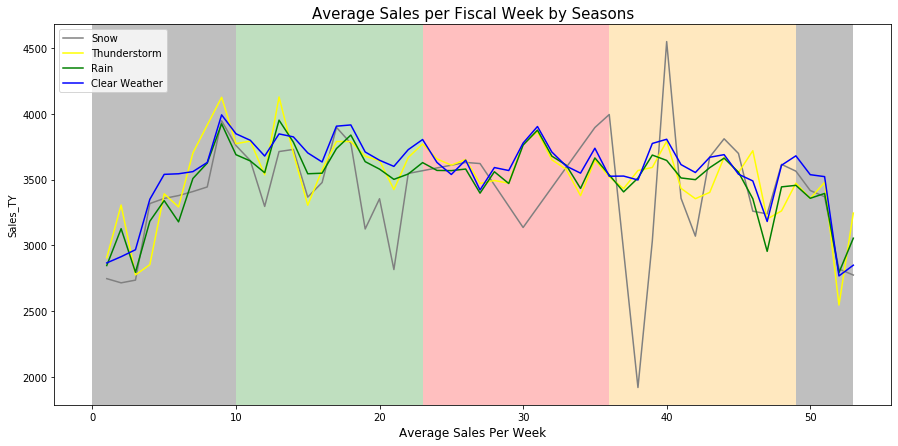

In [173]:
plt.figure(figsize = (15,7))
sns.lineplot(sales_and_weather.loc[sales_and_weather['snow'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Fiscal_Week_Number'],
            sales_and_weather.loc[sales_and_weather['snow'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Sales_TY'], 
             color = 'grey', label = 'Snow')
sns.lineplot(sales_and_weather.loc[sales_and_weather['thunderstorm'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Fiscal_Week_Number'],
            sales_and_weather.loc[sales_and_weather['thunderstorm'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Sales_TY'], 
             color = 'yellow', label = 'Thunderstorm')
sns.lineplot(sales_and_weather.loc[sales_and_weather['rain'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Fiscal_Week_Number'],
            sales_and_weather.loc[sales_and_weather['rain'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Sales_TY'], 
             color = 'green', label = 'Rain')
sns.lineplot(sales_and_weather.loc[sales_and_weather['clear_weather'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Fiscal_Week_Number'],
            sales_and_weather.loc[sales_and_weather['clear_weather'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Sales_TY'], 
             color = 'blue', label = 'Clear Weather')
plt.xlabel('Fiscal Week Number', size = 12)
plt.xlabel('Average Sales Per Week', size = 12)
plt.title('Average Sales per Fiscal Week by Seasons', size =15)
plt.axvspan(0,10, facecolor = 'k', alpha = 0.25)
plt.axvspan(49,53, facecolor = 'k', alpha = 0.25)
plt.axvspan(10,23, facecolor = 'green', alpha = 0.25)
plt.axvspan(23,36, facecolor = 'red', alpha = 0.25)
plt.axvspan(36,49, facecolor = 'orange', alpha = 0.25)
plt.show()

## arg_sales Time Series

In [137]:
def quick_time_series():
    """takes restaurant number as input and quickly plots time series of that restaurant's sales over time
    
    Args:
    
    rest_number: corresponds to Inspire Brands restaurant number
    
    
    """
    rest_number = int(input("Enter # of Restaurant for Quick Time Series: "))
    dates = [2015, 2016, 2017, 2018]
    plt.figure(figsize = (20,5))
    plt.title('Time Series of Restaurant #{}'.format(rest_number), size=15)
    plt.xlabel('Date', size = 12)
    plt.ylabel('Sales Total per Day', size = 12)
    for x in dates:
        plt.plot(arg_sales.loc[(arg_sales['Rest_Number'] == rest_number) & (arg_sales['Fiscal_Year'] == x)]['Days_Date'],
                 arg_sales.loc[(arg_sales['Rest_Number'] == rest_number) & (arg_sales['Fiscal_Year'] == x)]['Sales_TY'])
    plt.show()

Enter # of Restaurant for Quick Time Series: 10


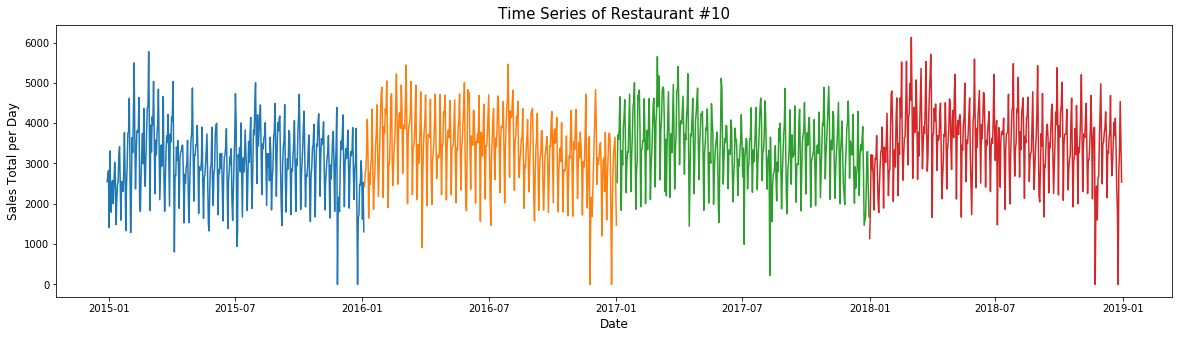

In [138]:
quick_time_series()

## Sales by State

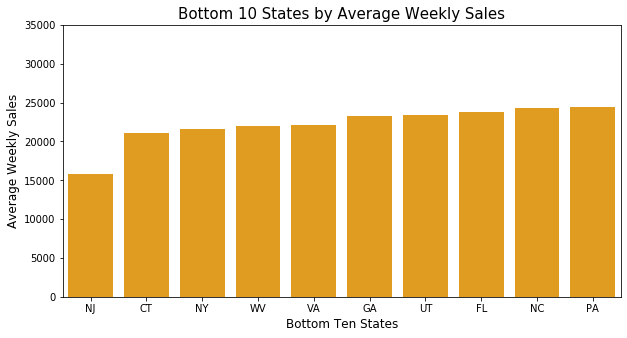

In [176]:
plt.figure(figsize = (10,5))
sns.barplot(modeling_df.groupby('rest_addrstate').mean().sort_values('sum total sales')[:10].index,
            modeling_df.groupby('rest_addrstate').mean().sort_values('sum total sales')[:10]['sum total sales'], 
            color = 'orange')
plt.ylabel('Average Weekly Sales', size = 12)
plt.xlabel('Bottom Ten States', size = 12)
plt.title('Bottom 10 States by Average Weekly Sales', size = 15)
plt.yticks(np.arange(0,40000, 5000))
plt.show()
            

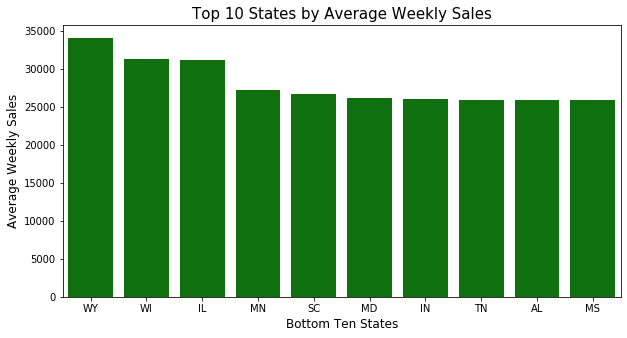

In [171]:
plt.figure(figsize = (10,5))
sns.barplot(modeling_df.groupby('rest_addrstate').mean().sort_values('sum total sales', 
                                                                     ascending = False)[:10].index,
            modeling_df.groupby('rest_addrstate').mean().sort_values('sum total sales', 
                                                                     ascending = False)[:10]['sum total sales'], 
            color = 'green')
plt.ylabel('Average Weekly Sales', size = 12)
plt.xlabel('Bottom Ten States', size = 12)
plt.title('Top 10 States by Average Weekly Sales', size = 15)
plt.show()

## print_media drop_date

In [198]:
drop_dates = list(print_media.loc[(print_media['rest_number'] == 1) & (print_media['fiscal_year'] == 2015)]['drop_date'])

In [194]:
arg_sales_test = arg_sales.loc[(arg_sales['Rest_Number'] == 1) & (arg_sales['Fiscal_Year'] == 2015)]
arg_sales_test

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
0,1,536,YOUNGSTOWN,2015,1,2014-12-29,2600.03
1,1,536,YOUNGSTOWN,2015,1,2014-12-30,2333.04
2,1,536,YOUNGSTOWN,2015,1,2014-12-31,2045.05
3,1,536,YOUNGSTOWN,2015,1,2015-01-01,1355.33
4,1,536,YOUNGSTOWN,2015,1,2015-01-02,2645.63
...,...,...,...,...,...,...,...
366,1,536,YOUNGSTOWN,2015,53,2015-12-30,2727.40
367,1,536,YOUNGSTOWN,2015,53,2015-12-31,2001.66
368,1,536,YOUNGSTOWN,2015,53,2016-01-01,1415.15
369,1,536,YOUNGSTOWN,2015,53,2016-01-02,2186.61


In [203]:
arg_sales_test['print_media_drop_date'] = [x if x in drop_dates else None for x in arg_sales_test['Days_Date']]





arg_sales_test

/Users/will4856/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY,print_media_drop_date
0,1,536,YOUNGSTOWN,2015,1,2014-12-29,2600.03,NaT
1,1,536,YOUNGSTOWN,2015,1,2014-12-30,2333.04,NaT
2,1,536,YOUNGSTOWN,2015,1,2014-12-31,2045.05,NaT
3,1,536,YOUNGSTOWN,2015,1,2015-01-01,1355.33,NaT
4,1,536,YOUNGSTOWN,2015,1,2015-01-02,2645.63,NaT
...,...,...,...,...,...,...,...,...
366,1,536,YOUNGSTOWN,2015,53,2015-12-30,2727.40,NaT
367,1,536,YOUNGSTOWN,2015,53,2015-12-31,2001.66,NaT
368,1,536,YOUNGSTOWN,2015,53,2016-01-01,1415.15,NaT
369,1,536,YOUNGSTOWN,2015,53,2016-01-02,2186.61,NaT


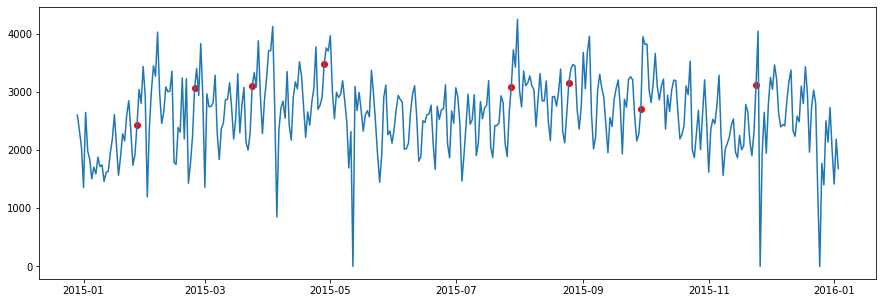

In [222]:
plt.figure(figsize = (15,5))
plt.plot(arg_sales_test['Days_Date'],arg_sales_test['Sales_TY'])
plt.scatter(arg_sales_test['print_media_drop_date'],arg_sales_test['Sales_TY'], color = 'red')
plt.show()

In [184]:
arg_sales.merge(print_media, how = 'left', left_on=['Rest_Number','Fiscal_Year','Fiscal_Week_Number'],
               right_on=['rest_number', 'fiscal_year', 'fiscal_week_number'])

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY,rest_number,drop_date,fiscal_year,fiscal_week_number
0,1,536,YOUNGSTOWN,2015,1,2014-12-29,2600.03,NaN,NaT,NaN,NaN
1,1,536,YOUNGSTOWN,2015,1,2014-12-30,2333.04,NaN,NaT,NaN,NaN
2,1,536,YOUNGSTOWN,2015,1,2014-12-31,2045.05,NaN,NaT,NaN,NaN
3,1,536,YOUNGSTOWN,2015,1,2015-01-01,1355.33,NaN,NaT,NaN,NaN
4,1,536,YOUNGSTOWN,2015,1,2015-01-02,2645.63,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1495895,9002,524,ATLANTA,2018,52,2018-12-26,2530.15,NaN,NaT,NaN,NaN
1495896,9002,524,ATLANTA,2018,52,2018-12-27,2534.33,NaN,NaT,NaN,NaN
1495897,9002,524,ATLANTA,2018,52,2018-12-28,2767.72,NaN,NaT,NaN,NaN
1495898,9002,524,ATLANTA,2018,52,2018-12-29,2607.02,NaN,NaT,NaN,NaN


In [142]:
modeling_df

,rest_age,rest_number,rest_dma_code,rest_dma_desc,fiscal_year,fiscal_week_number,sum total sales,rest_status,rest_addrstate,rest_remodeldt,rest_opendate,rest_closedate,# of mcdonalds <1 mi,# of subway <1 mi,# of wendys <1 mi,# of burger king <1 mi,# of taco bell <1 mi,# of mcdonalds <0.5 mi,# of subway <0.5 mi,# of wendys <0.5 mi,# of burger king <0.5 mi,# of taco bell <0.5 mi,sum_of_competitors,onair_ty,equal_trps_cm_ty,print_media_drop_date
0,762,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
1,762,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
2,762,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,0,0,NaT
3,762,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,41,NaT
4,762,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,1,1,0,0,0,5,1,123,2015-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205054,4560,8088,510,CLEVELAND-AKRON,2018,20,9253.62,Open,OH,1753-01-01,2015-11-23,1753-01-01,0,0,0,0,0,0,0,0,0,0,0,1,230,NaT
205055,4560,8088,510,CLEVELAND-AKRON,2018,21,8794.69,Open,OH,1753-01-01,2015-11-23,1753-01-01,0,0,0,0,0,0,0,0,0,0,0,1,220,NaT
205056,4560,8088,510,CLEVELAND-AKRON,2018,22,9926.81,Open,OH,1753-01-01,2015-11-23,1753-01-01,0,0,0,0,0,0,0,0,0,0,0,1,159,2018-05-29
205057,4560,8088,510,CLEVELAND-AKRON,2018,23,11459.81,Open,OH,1753-01-01,2015-11-23,1753-01-01,0,0,0,0,0,0,0,0,0,0,0,1,150,NaT


## total_sales

In [ ]:
modeling_df['REST_STATUS'].value_counts()

# Modeling Test

In [ ]:
time_series_test

In [ ]:
time_series_diff = time_series_test.diff()
time_series_test.plot(figsize = (20,5))
plt.show()

In [ ]:
p = d = q = range(0,2)

pdq = list(itertools.product(p, d, q))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(time_series_test,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [ ]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(time_series_test, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 0, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

In [ ]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [ ]:
pred = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = time_series_test['2015-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=7)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [ ]:
ax = time_series_test.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()